In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
pd.read_csv("/content/Chemical Composion of Ceramic.csv")
data=pd.read_csv("/content/Chemical Composion of Ceramic.csv")
data

,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-1-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-2-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-3-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-4-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-5-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,DY-M-3-g,Glaze,0.34,0.55,12.37,70.70,5.33,8.06,0.06,1.61,1250,10,90,30,250,520,30,140,690
84,DY-QC-1-g,Glaze,0.72,0.34,12.20,72.19,6.19,6.06,0.04,1.27,1700,60,110,10,270,540,40,120,630
85,DY-QC-2-g,Glaze,0.23,0.24,12.99,71.81,5.25,7.15,0.05,1.29,750,40,100,0,240,470,40,120,480
86,DY-QC-3-g,Glaze,0.14,0.46,12.62,69.16,4.34,11.03,0.05,1.20,920,40,90,20,230,470,40,130,1100


In [ ]:
data.drop("Ceramic Name", axis=1, inplace=True)
X = data.drop('Part', axis=1)
y = data['Part']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Создается модель классификатора случайного леса. n_estimators=100 задает количество деревьев в лесу, random_state=42 обеспечивает воспроизводимость результатов.

In [ ]:
model = RandomForestClassifier(n_estimators=10, random_state=42, )

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
accuracy = model.score(X_test, y_test)
print(f"Точность модели Random Forest: {accuracy:.2333f}")

Точность модели Random Forest: 1.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [ ]:
X_test

,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
76,1.00,0.52,13.70,70.52,6.74,5.34,0.05,1.11,1510,70,140,50,320,610,30,120,490
0,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
26,0.34,0.47,22.48,67.80,5.45,0.49,0.14,1.83,310,10,120,40,320,10,60,170,120
22,0.29,0.33,23.49,67.94,4.46,0.17,0.16,2.15,310,0,80,20,230,20,30,210,170
12,0.76,0.44,19.45,72.52,3.94,0.58,0.07,1.24,420,50,100,10,390,30,30,80,150
67,0.65,0.78,13.81,70.37,5.91,6.14,0.08,1.27,1500,30,110,30,290,490,30,110,720
10,0.35,0.23,19.53,72.87,4.62,0.28,0.07,1.05,320,70,40,20,450,10,40,120,140
18,0.25,0.49,20.79,69.92,5.37,0.18,0.15,1.86,470,30,120,80,370,10,50,180,60
4,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150
68,0.03,1.01,13.05,72.28,5.56,5.77,0.07,1.24,1750,20,150,30,270,330,30,130,960


In [ ]:
y_test

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

model.predict_proba возвращает вероятности принадлежности к классам. roc_curve вычисляет значения FPR и TPR для построения ROC-кривой, а auc вычисляет площадь под ROC-кривой.

y_probs[:, 1]: y_probs содержит предсказанные вероятности принадлежности к классам. [:, 1] означает, что мы извлекаем только вероятности принадлежности к положительному классу из массива вероятностей для всех объектов.

roc_curve(y_test, y_probs[:, 1]): roc_curve вычисляет значения False Positive Rate (FPR), True Positive Rate (TPR) и пороги для этих значений, чтобы построить ROC-кривую.

fpr: Массив значений False Positive Rate для разных порогов.

tpr: Массив значений True Positive Rate для тех же порогов.

thresholds: Пороги, при которых достигается соответствующее значение FPR и TPR.

auc(fpr, tpr): auc вычисляет площадь под кривой (Area Under Curve, AUC) ROC, используя значения FPR и TPR, чтобы оценить качество модели. AUC - это мера, показывающая, насколько хорошо модель различает классы: чем выше AUC, тем лучше модель.

In [ ]:
y_probs = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])

In [ ]:
roc_auc = auc(fpr, tpr)

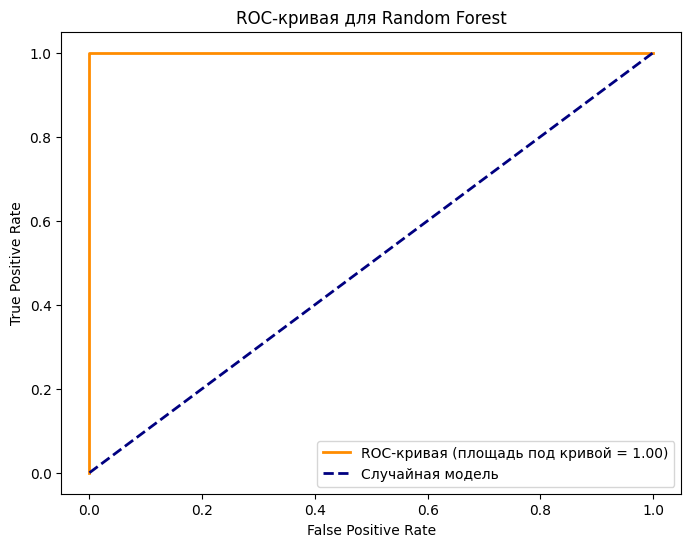

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-кривая (площадь под кривой = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайная модель')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для Random Forest')
plt.legend(loc='lower right')
plt.show()